# **. Import Libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


# **. Load Dataset:**

In [2]:
df = pd.read_csv('Heart.csv')
df1=df


# **. Data Exploration:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All Colimns are Numeric type

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Statics shows the count of each column along with their mean value, standard deviation, minimum and maximum values.

Display first 5 rows of the dataset

In [5]:
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Checking Missing Value**

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No column has any missing value

# **Checking Duplicates**

In [7]:
data = df.drop_duplicates(subset ="output",)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


There only Binary Classification (0 and 1)

# **Plot chances of heart attack**

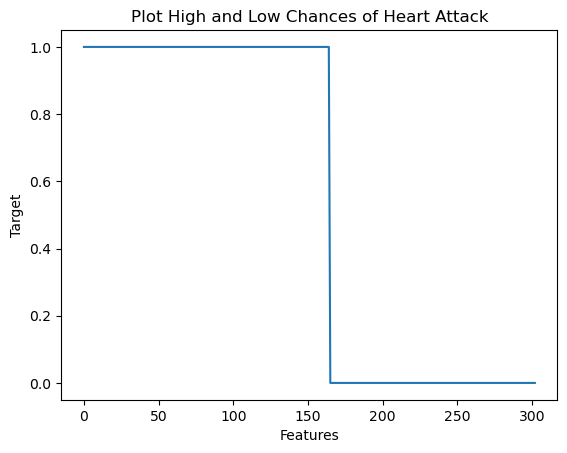

In [8]:
plt.plot(df.index, df['output'])
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Plot High and Low Chances of Heart Attack')
plt.show()

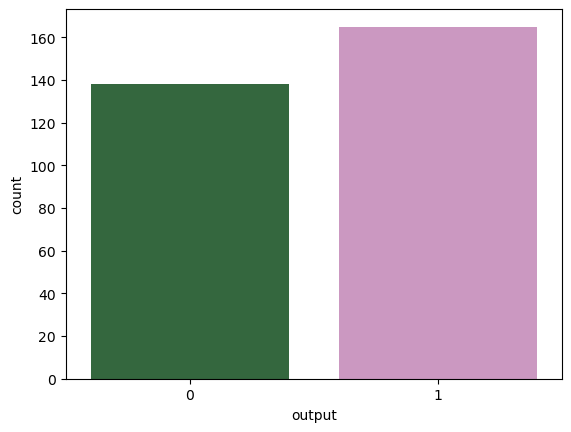

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


1    165
0    138
Name: output, dtype: int64

In [9]:
sns.countplot(x="output", data=df, palette="cubehelix")
plt.show()

df.output.value_counts()
countNoDisease = len(df[df.output == 0])
countHaveDisease = len(df[df.output == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.output))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.output))*100)))
df.output.value_counts()

# **Check gender distribution for the study**

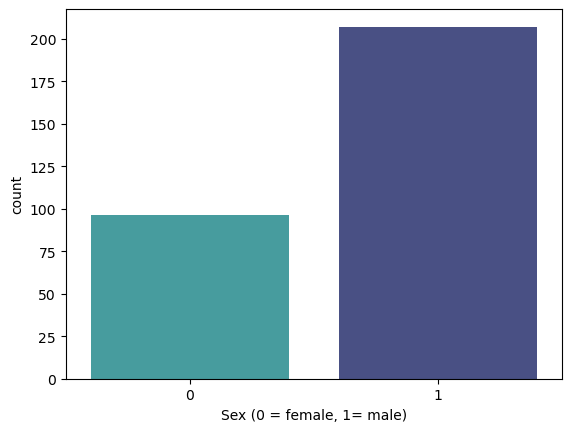

1    207
0     96
Name: sex, dtype: int64

In [10]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
df.sex.value_counts()

The participants male is almost 2/3 as compared to 1/3 of female

# **Correlation between sex and output**

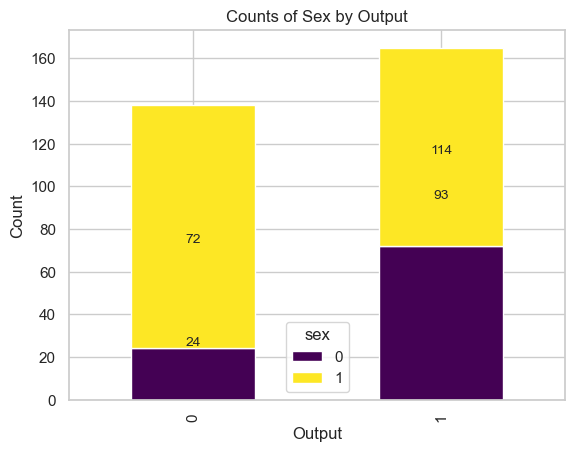

In [11]:
# Group and count data
grouped = df.groupby('output')['sex'].value_counts()

# Convert grouped data to a DataFrame for easy plotting
grouped_df = grouped.unstack()

# Plotting using Seaborn
sns.set(style="whitegrid")
ax = grouped_df.plot(kind="bar", stacked=True, colormap="viridis")

# Adding labels and title
plt.xlabel("Output")
plt.ylabel("Count")
plt.title("Counts of Sex by Output")

# Adding annotations for each bar
for i, col in enumerate(grouped_df.columns):
    for j, value in enumerate(grouped_df[col]):
        ax.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()


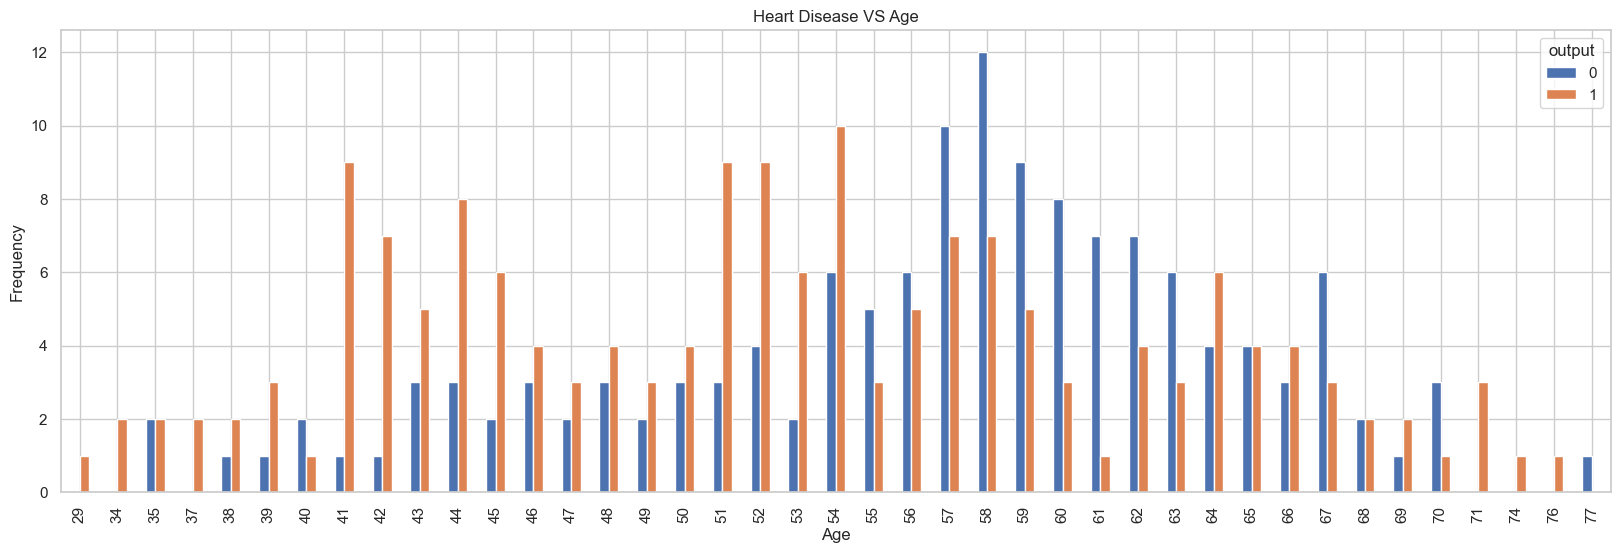

In [12]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease VS Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# **Correlation between SLP and output**

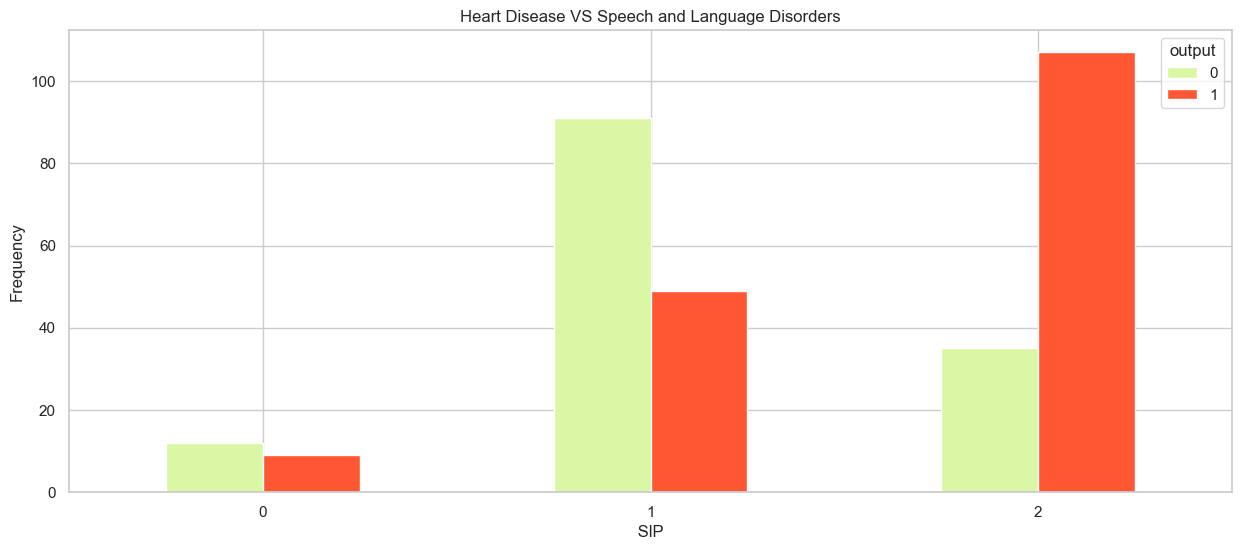

In [13]:
pd.crosstab(df.slp,df.output).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease VS Speech and Language Disorders')
plt.xlabel(' SlP ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()


# **Correlation between FBS and output bold text**

<function matplotlib.pyplot.show(close=None, block=None)>

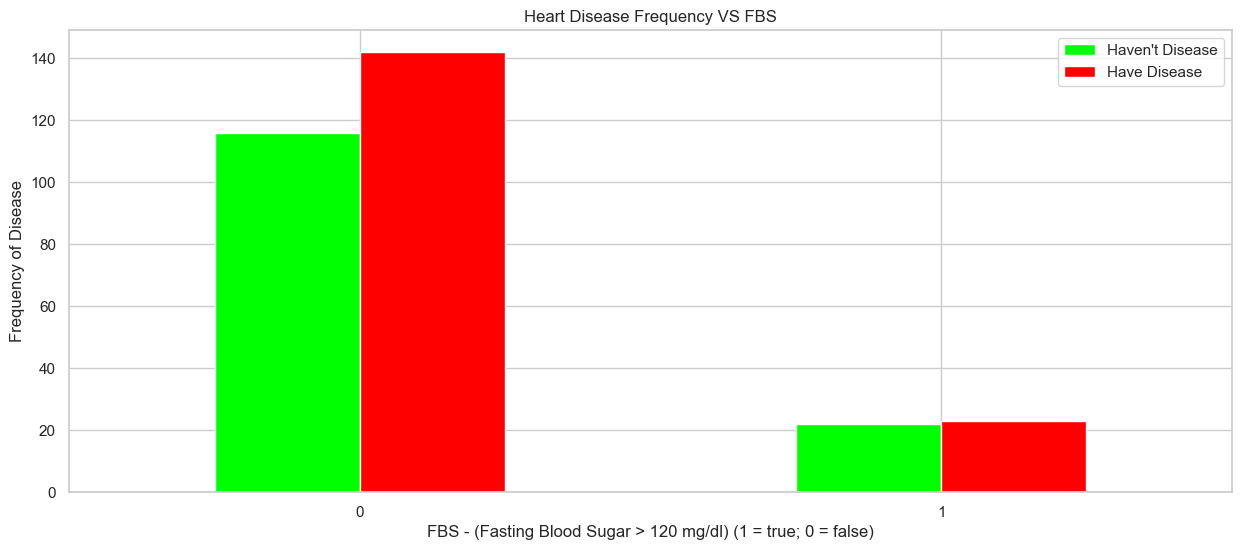

In [14]:
pd.crosstab(df.fbs,df.output).plot(kind="bar",figsize=(15,6),color=['#00FF00','#FF0000' ])
plt.title('Heart Disease Frequency VS FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease')
plt.show

# **Correlation between Chest pain type and output**

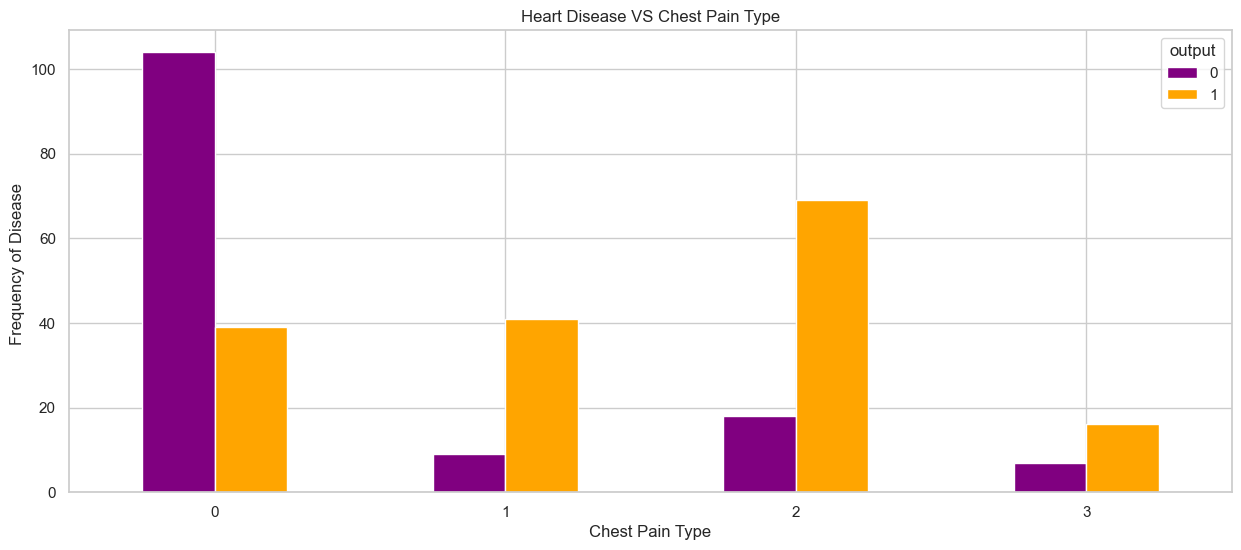

In [15]:
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(15,6),color=['#800080','#FFA500' ])
plt.title('Heart Disease VS Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease ')
plt.show()

# **correlation coefficients between features and the output**

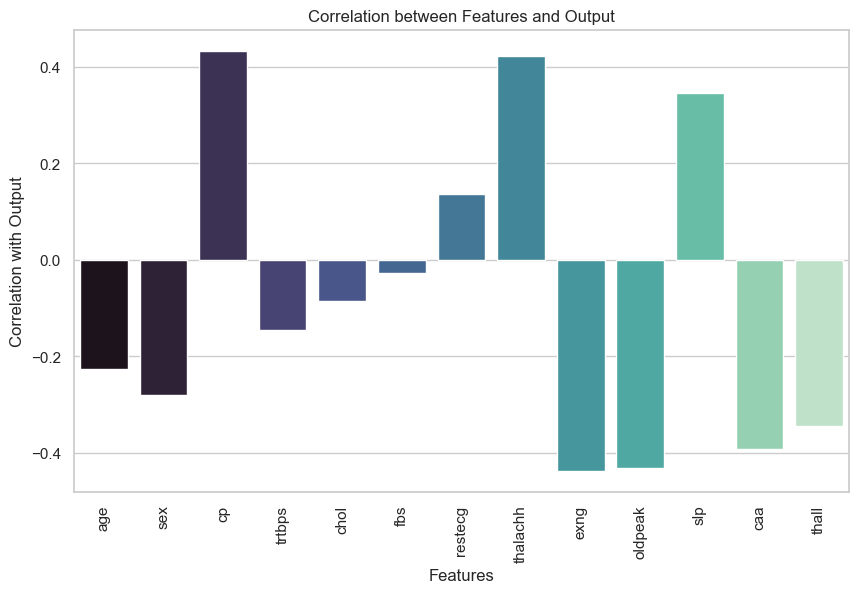

In [16]:


# Calculate the correlation coefficients between features and the label 'output'
correlation_with_output = df.corr()['output'].drop('output')

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_output.index, y=correlation_with_output.values, palette="mako")

# Adding labels and title
plt.xlabel("Features")
plt.ylabel("Correlation with Output")
plt.title("Correlation between Features and Output")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


Split data as 80%  will be train data and 20% will be test data.

In [17]:
X = df.drop("output", axis=1)
y = df["output"]


 Split data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Decision Tree classifier

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)



DecisionTreeClassifier()

### Make predictions on the test set

In [20]:
 y_pred = model.predict(X_test)




Decision Tree Classifier with 'gini and train the decesion classifier with max of 10 tree levels

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier (criterion='gini',max_depth=10)
clf.fit(X,y)


DecisionTreeClassifier(max_depth=10)

Evaluate the 'gini' Decision Tree

In [22]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.8032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



Visualize the 'gini' Decision Tree

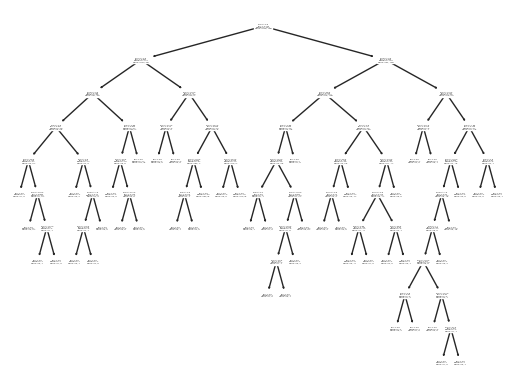

In [23]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

Decision Tree Classifier with 'entropy'

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Evaluate the 'entropy' Decision Tree

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.8032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



First round of hyperparameter tuning

In [26]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
model = DecisionTreeClassifier()

In [28]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [29]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [30]:
y_pred = best_model.predict(X_test)

 Evaluation after first round of tuning

In [31]:
from sklearn.metrics import accuracy_score, classification_report as cls_report

accuracy = accuracy_score(y_test, y_pred)
classification_report = cls_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



Second round of hyperparameter tuning

In [32]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

In [33]:
# Create the Decision Tree classifier
model = DecisionTreeClassifier()

In [34]:
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [35]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [36]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

Second round of hyperparameter tuning

In [37]:
from sklearn.metrics import accuracy_score, classification_report as cls_report

accuracy = accuracy_score(y_test, y_pred)
classification_report = cls_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        29
           1       0.85      0.69      0.76        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



SVM Classifier

In [38]:

model = SVC()


### Train the model

In [39]:
model.fit(X_train, y_train)

SVC()

In [40]:
y_pred = model.predict(X_test)

Evaluate the SVM

In [41]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = cls_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.7049180327868853
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



  Random Forest Classifier

In [42]:
# Create the Random Forest classifier
model = RandomForestClassifier()

In [43]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

Random Forest Classifier

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = cls_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



 Logistic Regression Classifier

In [46]:
# Create the Logistic Regression classifier
model = LogisticRegression()

### Train the model

In [47]:
model.fit(X_train, y_train)

C:\Users\x235814\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Make predictions on the test set
y_pred = model.predict(X_test)

 Evaluate the Logistic Regression

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = cls_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report)

Accuracy: 0.8852459016393442
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### A variety of models were leveraged in the training process, supplemented with rigorous hyperparameter tuning methodologies. The performance of these models was rigorously evaluated based on key metrics, namely, precesion and the F1-score. Upon exhaustive evaluation, it emerged that the Decesion tree model after second round of parameter tuning  outperformed as compared to other model as precesion reached out to 95%, Precesion was chosen as the measured metrics as it is very critical to confirm the probability for heart attack disease.

In [51]:
import pandas as pd
from pycaret.classification import *

In [52]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
df1.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [55]:
cat_features1= ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
cat_features1

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [56]:
experiment = setup(df1, target='output', categorical_features=cat_features1)

,Description,Value
0,Session id,1348
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 28)"
5,Transformed train set shape,"(212, 28)"
6,Transformed test set shape,"(91, 28)"
7,Ordinal features,3
8,Categorical features,13
9,Preprocess,True


In [57]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8444,0.0000,0.9038,0.8424,0.8640,0.6834,0.7028,0.4550
lda,Linear Discriminant Analysis,0.8444,0.9169,0.9038,0.8424,0.8640,0.6834,0.7028,0.4850
catboost,CatBoost Classifier,0.8398,0.9138,0.8689,0.8534,0.8553,0.6756,0.6864,1.3460
nb,Naive Bayes,0.8351,0.8842,0.8864,0.8316,0.8541,0.6646,0.6765,0.4280
lr,Logistic Regression,0.8348,0.9116,0.8939,0.8310,0.8548,0.6642,0.6805,1.9700
xgboost,Extreme Gradient Boosting,0.8258,0.8995,0.8515,0.8512,0.8418,0.6471,0.6658,0.5470
rf,Random Forest Classifier,0.8212,0.9030,0.8606,0.8327,0.8396,0.6373,0.6500,0.7220
lightgbm,Light Gradient Boosting Machine,0.8212,0.9018,0.8356,0.8571,0.8350,0.6402,0.6607,0.5970
et,Extra Trees Classifier,0.8117,0.8844,0.8424,0.8243,0.8280,0.6194,0.6292,0.7270
gbc,Gradient Boosting Classifier,0.7877,0.8746,0.8341,0.8021,0.8095,0.5700,0.5877,0.5970


Processing:   0%|          | 0/69 [00:00<?, ?it/s]